In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import tushare as ts
pd.set_option('display.max_rows', 50000)  # 最多显示数据的行数
code_list = ['600619']
for i in code_list:
    df = ts.get_k_data(i, ktype='D', start='2011-19-27', end='2021-10-13')
df['ma_short'] = df['close'].rolling(5, min_periods=1).mean()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [24]:
df.to_excel('temp.xls')

c:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [2]:
para = 10
half = int(para/2)
# df['left_min']=df['low'].shift(half).rolling(half,min_periods=1).min()
# df['right_min']=df['low'].rolling(half,min_periods=1).min()
df.reset_index(inplace=True,drop=True)
df['left_min'] = np.nan
df['right_min'] = np.nan
df['left_min_index'] = np.nan
df['right_min_index'] = np.nan
df['middle_low_max'] = np.nan
df['middle_high_max'] = np.nan


In [ ]:
for i in range(para-1,df.shape[0]):
    up = int(i-half)
    down = int(i-half+1)
    left_min_index = up
    right_min_index = down
    left_min_value = df.iat[up,4]
    right_min_value = df.iat[down,4]

    for step in range(half-1):
        up-=1
        if df.iat[up,4] < left_min_value:
            left_min_value = df.iat[up,4]
            left_min_index = up
        else:
            pass

        down+=1
        if df.iat[down,4] < right_min_value:
            right_min_value = df.iat[down,4]
            right_min_index = down
        else:
            pass
    
    df.loc[i,'left_min'] = left_min_value
    df.loc[i,'right_min'] = right_min_value
    df.loc[i,'left_min_index'] = left_min_index
    df.loc[i,'right_min_index'] = right_min_index
    df.loc[i,'middle_low_max'] = df.iloc[left_min_index+1:right_min_index,4].max() # middle_low_max
    df.loc[i,'middle_high_max'] = df.iloc[left_min_index+1:right_min_index,3].max() # middle_high_max


In [ ]:
df['low_x_days_ago'] = df['low'].shift(int(1.5 * para))
df.tail(100)

In [ ]:
fund_condition1 = df['left_min'] < df['middle_low_max']
fund_condition2 = df['right_min'] < df['middle_low_max']
condition1 = df['low_x_days_ago'] > df['middle_high_max']
condition2 = df['close'] > df.iloc[left_min_index+1:right_min_index,4].max()
condition3 = df['close'] > df['middle_high_max']

In [ ]:
print(df[fund_condition1].shape[0])
print(df[fund_condition1 & fund_condition2].shape[0])
print(df[fund_condition1 & fund_condition2 & fund_condition3].shape[0])
print(df[fund_condition1 & fund_condition2 & fund_condition4].shape[0])
print(df[fund_condition1 & fund_condition2 & condition1].shape[0])
print(df[fund_condition1 & fund_condition2 & condition1 & condition2].shape[0])
print(df[fund_condition1 & fund_condition2 & condition1 & condition2 & condition3].shape[0])

In [ ]:
df.loc[(fund_condition1 & fund_condition2 & condition1 & condition3),'signal'] = 1
df[df['signal']==1]

In [ ]:
position_at_close(df)

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
 
num_points = 1000
vectors_set = []
for i in range (num_points):
    x1 = np.random.normal (0.0, 0.6)
    y1 = x1*0.5+0.3+np.random.normal(0.0,0.3)
    vectors_set.append([x1,y1])
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]
# display
plt.scatter (x_data,y_data, c='r')
plt.show

In [ ]:
# 在返回（-1, 1）范围内的等差序列，生成200个数字
X = np.linspace(-1, 1, 200)
  
# 打乱顺序
np.random.shuffle(X) 

# 生成Y并添加噪声
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, 200)

# 画图

plt.scatter(X, Y)
plt.show()

In [ ]:
y = np.array([9.01,9.02,9.03,9.08,8.01,8.0,8.03,7.94])
x = np.array([1,1,1,1,2,2,2,2])
plt.scatter(x, y)
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x, y, epochs=100, verbose=1)

# 画出损失函数的图
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnidute")
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# 测试
lost = model.evaluate(x, y, batch_size=1, verbose=0)
print('test lost:', lost)

# 将训练结果绘出
Y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y)
plt.show()

In [ ]:
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

step: 50, loss: 0.138827, W: 0.392687, b: -0.201195
step: 100, loss: 0.131748, W: 0.384376, b: -0.142275
step: 150, loss: 0.125478, W: 0.376555, b: -0.086825
step: 200, loss: 0.119926, W: 0.369195, b: -0.034643
step: 250, loss: 0.115008, W: 0.362268, b: 0.014464
step: 300, loss: 0.110653, W: 0.355749, b: 0.060678
step: 350, loss: 0.106796, W: 0.349615, b: 0.104169
step: 400, loss: 0.103380, W: 0.343842, b: 0.145098
step: 450, loss: 0.100355, W: 0.338409, b: 0.183615
step: 500, loss: 0.097676, W: 0.333296, b: 0.219862
step: 550, loss: 0.095303, W: 0.328484, b: 0.253974
step: 600, loss: 0.093201, W: 0.323956, b: 0.286076
step: 650, loss: 0.091340, W: 0.319695, b: 0.316286
step: 700, loss: 0.089692, W: 0.315685, b: 0.344716
step: 750, loss: 0.088232, W: 0.311911, b: 0.371472
step: 800, loss: 0.086939, W: 0.308359, b: 0.396650
step: 850, loss: 0.085795, W: 0.305017, b: 0.420346
step: 900, loss: 0.084781, W: 0.301872, b: 0.442645
step: 950, loss: 0.083883, W: 0.298912, b: 0.463630
step: 100

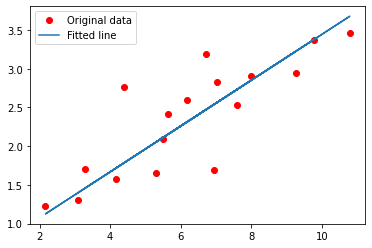

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# 学习率
learning_rate = 0.01

# 迭代次数
training_steps = 1000

display_step = 50

# 训练数据
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

#  取出数组X的长度
n_samples = X.shape[0]

# 随机初始化权重，偏置
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")


# 线性回归(Wx+b)
def linear_regression(x):
    return W * x + b


# 均方差
def mean_square(y_pred,y_true):
    return tf.reduce_sum(tf.pow(y_pred - y_true, 2)) / (2 * n_samples)


# 随机梯度下降优化器
optimizer = tf.optimizers.SGD(learning_rate)


# 优化过程
def run_optimization():
    # 将计算封装在GradientTape中以实现自动微分
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # 计算梯度
    # print("loss is ", loss)
    gradients = g.gradient(loss, [W, b])

    # 按gradients更新 W 和 b
    optimizer.apply_gradients(zip(gradients, [W, b]))


# 针对给定训练步骤数开始训练
for step in range(1, training_steps + 1):
    # 运行优化以更新W和b值
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

# 绘制图
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()


In [6]:

print('Weights=', W.value(), '\nbiases=', b.value())

Weights= tf.Tensor(0.29612616, shape=(), dtype=float32) 
biases= tf.Tensor(0.4833785, shape=(), dtype=float32)


In [49]:
l1=[9.95,9.88,9.97,9.76,
9.88,9.9,9.92,9.84,
9.8,9.81,9.86,9.65,
9.76,9.69,9.8,9.66,
9.62,9.66,9.75,9.62,
9.65,9.58,9.66,9.51,
9.9,10.09,10.19,9.86,
10.01,9.89,10.02,9.82,
9.94,9.93,9.96,9.83,
9.91,10.05,10.44,9.86,
9.96,9.78,9.96,9.62,
9.72,9.56,9.78,9.47,
9.58,9.26,9.64,9.25,
9.22,9.26,9.28,9.14,
9.2,9.23,9.25,9.16,
9.28,9.23,9.34,9.18,
9.17,8.81,9.17,8.75,
8.86,8.76,8.86,8.76,
8.83,8.49,8.91,8.49,
8.42,8.47,8.59,8.42,
8.46,8.32,8.56,8.3,
8.38,8.22,8.4,8.21,
8.15,8.46,8.49,8.03]
for i in range(len(l1)):
    l1[i] -= 8.20

l2=[]
for i in range(23):
    l2.append(i+1)
    l2.append(i+1)
    l2.append(i+1)
    l2.append(i+1)

In [50]:
x = np.array(l2)
y = np.array(l1)

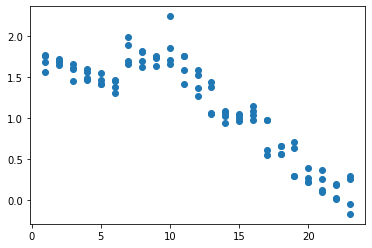

In [51]:
plt.scatter(x, y)
plt.show()

step: 50, loss: 0.259307, W: 0.002577, b: 0.732581
step: 100, loss: 0.211433, W: -0.001401, b: 0.882483
step: 150, loss: 0.175871, W: -0.009891, b: 1.015559
step: 200, loss: 0.147711, W: -0.017459, b: 1.133979
step: 250, loss: 0.125412, W: -0.024194, b: 1.239356
step: 300, loss: 0.107755, W: -0.030186, b: 1.333129
step: 350, loss: 0.093772, W: -0.035519, b: 1.416573
step: 400, loss: 0.082700, W: -0.040265, b: 1.490828
step: 450, loss: 0.073932, W: -0.044488, b: 1.556905
step: 500, loss: 0.066989, W: -0.048246, b: 1.615705
step: 550, loss: 0.061491, W: -0.051590, b: 1.668029
step: 600, loss: 0.057138, W: -0.054565, b: 1.714591
step: 650, loss: 0.053690, W: -0.057213, b: 1.756024
step: 700, loss: 0.050961, W: -0.059570, b: 1.792895
step: 750, loss: 0.048799, W: -0.061667, b: 1.825705
step: 800, loss: 0.047087, W: -0.063533, b: 1.854902
step: 850, loss: 0.045732, W: -0.065193, b: 1.880883
step: 900, loss: 0.044658, W: -0.066670, b: 1.904002
step: 950, loss: 0.043808, W: -0.067985, b: 1.92

step: 7700, loss: 0.040574, W: -0.078606, b: 2.090762
step: 7750, loss: 0.040574, W: -0.078606, b: 2.090762
step: 7800, loss: 0.040574, W: -0.078606, b: 2.090762
step: 7850, loss: 0.040574, W: -0.078606, b: 2.090762
step: 7900, loss: 0.040574, W: -0.078606, b: 2.090762
step: 7950, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8000, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8050, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8100, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8150, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8200, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8250, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8300, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8350, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8400, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8450, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8500, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8550, loss: 0.040574, W: -0.078606, b: 2.090762
step: 8600, loss: 0.040574, 

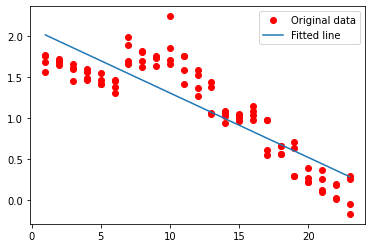

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# 学习率
learning_rate = 0.01

# 迭代次数
training_steps = 1000

display_step = 50

# 训练数据
X = x
Y = y

#  取出数组X的长度
n_samples = X.shape[0]

# 随机初始化权重，偏置
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")


# 线性回归(Wx+b)
def linear_regression(x):
    return W * x + b


# 均方差
def mean_square(y_pred,y_true):
    return tf.reduce_sum(tf.pow(y_pred - y_true, 2)) / (2 * n_samples)


# 随机梯度下降优化器
optimizer = tf.optimizers.SGD(learning_rate)


# 优化过程
def run_optimization():
    # 将计算封装在GradientTape中以实现自动微分
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # 计算梯度
    # print("loss is ", loss)
    gradients = g.gradient(loss, [W, b])

    # 按gradients更新 W 和 b
    optimizer.apply_gradients(zip(gradients, [W, b]))


# 针对给定训练步骤数开始训练
for step in range(1,10000):
    # 运行优化以更新W和b值
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

# 绘制图
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()